# Survey Window

In [1]:
import os
import sys
from pathlib import Path

repo_root = Path(os.getcwd()).parent
sys.path.insert(0, str(repo_root))

In [2]:
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np

from pipeline import harmony
from harmonia.algorithms import CartesianArray

plt.style.use(harmony)

In [3]:
case = 'full-sky'  # 'partial-sky'

if case == 'full-sky':
    info = "mask=1.0,selection=None"
if case == 'partial-sky':
    info = "mask=random0_BOSS_DR12v5_CMASS_North,selection=[100.0,500.0]"

In [4]:
storage = repo_root/"storage"/"processed"/"survey_products"

mask_multipoles = np.load(
    storage/
    "mask-(orders=[0,2,4,6,8],boxsize=1000.0,expansion=70.0,mesh=768,{}).npy".format(info)
)

window_multipoles = CartesianArray.load(
    storage/
    "window-(orders=[0,2,4,6,8],boxsize=1000.0,expansion=70.0,mesh=768,{}).npz".format(info)
)

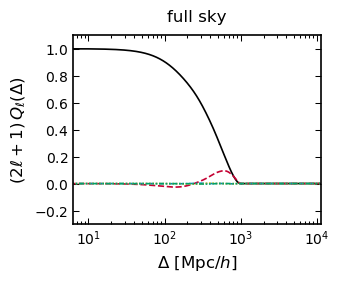

In [5]:
fig = plt.figure(figsize=(3.2, 2.5), dpi=100)

ax = plt.subplot2grid((1, 1), (0, 0))

for ell, ls in zip(
        [0, 2, 4, 6, 8], 
        ['-', '--', (0, (3, 1, 1, 1)), (0, (1, 1)), (0, (3, 1, 1, 1, 1, 1))]
    ):
    ax.semilogx(
        mask_multipoles['separation'][mask_multipoles['order'] == ell], 
        (2 * ell + 1) * mask_multipoles['correlation'][mask_multipoles['order'] == ell],
        ls=ls, label='$\ell = {}$'.format(ell)
    )

if case == 'partial-sky':
    ax.legend(handletextpad=0.5, handlelength=1.)
ax.set_yticks(np.arange(-0.2, 1.2, 0.2))
ax.set_xlim(right=2*np.pi/5.5e-4, left=2*np.pi/1.)
ax.set_ylim(bottom=-0.3, top=1.1)
ax.set_xlabel(r"$\Delta$ [Mpc/$h$]")
ax.set_ylabel(r"$(2\ell + 1)\,Q_\ell(\Delta)$")
ax.set_title('{}'.format(case.replace("-", " ")), pad=10)

fig.savefig(repo_root/"notebooks"/"publications"/"survey_window_{}.pdf".format(case))